In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = 'economic_freedom_index2019_data.csv'
data = pd.read_csv(url)

In [3]:
data.columns #to see the data we have

Index(['Country Name', 'Region', 'World Rank', 'Region Rank', '2019 Score',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Gov't Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom ', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'GDP Growth Rate (%)',
       'Unemployment (%)', 'Inflation (%)', 'GDP per Capita (PPP)'],
      dtype='object')

In [4]:
data.rename(columns={"World Rank": "World_Rank",
                     "GDP per Capita (PPP)": "GDP_per_Capita"}, inplace=True) 

In [5]:
data.isnull().sum() #we need to get rid of the n/a cells

Country Name                   0
Region                         0
World_Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
GDP Growth Rate (%)            2
Unemployment (%)               5
Inflation (%)                  4
GDP_per_Capita                 2
dtype: int64

In [6]:
data.fillna(method='ffill') 
numeric = data._get_numeric_data().columns
data[numeric] = data.groupby('Region')[numeric].transform(lambda x: x.fillna(x.median()))
#we fill the n/a values with the countries' median specified by their region

In [7]:
data.isnull().sum() #we check whether we get rid of the n/a values

Country Name                   0
Region                         0
World_Rank                     0
Region Rank                    0
2019 Score                     0
Property Rights                0
Judical Effectiveness          0
Government Integrity           0
Tax Burden                     0
Gov't Spending                 0
Fiscal Health                  0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
GDP Growth Rate (%)            0
Unemployment (%)               0
Inflation (%)                  0
GDP_per_Capita                 0
dtype: int64

In [8]:
data.head() #to see the overview of our dataset

,Country Name,Region,World_Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),Unemployment (%),Inflation (%),GDP_per_Capita
0,Afghanistan,Asia-Pacific,152.0,39.0,52.0,20.0,30.0,25.0,92.0,80.0,...,10.0,7.0,20.0,20.0,5.0,26.0,3.0,9.0,5.0,1958.0
1,Albania,Europe,52.0,27.0,67.0,55.0,31.0,40.0,86.0,74.0,...,70.0,1.0,23.0,15.0,25.0,30.0,4.0,14.0,2.0,12507.0
2,Algeria,Middle East and North Africa,171.0,14.0,46.0,32.0,36.0,29.0,76.0,49.0,...,30.0,9.0,35.0,23.0,25.0,41.0,2.0,10.0,6.0,15237.0
3,Angola,Sub-Saharan Africa,156.0,33.0,51.0,36.0,27.0,21.0,84.0,81.0,...,40.0,9.0,17.0,30.0,21.0,25.0,1.0,8.0,32.0,6753.0
4,Argentina,Americas,148.0,26.0,52.0,48.0,45.0,34.0,69.0,50.0,...,60.0,8.0,35.0,30.0,31.0,41.0,3.0,9.0,26.0,20876.0


In [9]:
data.info() #all is float numbers except country names and region names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 26 columns):
Country Name                   186 non-null object
Region                         186 non-null object
World_Rank                     186 non-null float64
Region Rank                    186 non-null float64
2019 Score                     186 non-null float64
Property Rights                186 non-null float64
Judical Effectiveness          186 non-null float64
Government Integrity           186 non-null float64
Tax Burden                     186 non-null float64
Gov't Spending                 186 non-null float64
Fiscal Health                  186 non-null float64
Business Freedom               186 non-null float64
Labor Freedom                  186 non-null float64
Monetary Freedom               186 non-null float64
Trade Freedom                  186 non-null float64
Investment Freedom             186 non-null float64
Financial Freedom              186 non-null float64
Tariff Rate (

In [10]:
data.GDP_per_Capita.sort_values(ascending=False).head(10) #detecting outliers

99     139100.0
136    124529.0
102    111629.0
101    106374.0
149     93906.0
22      78196.0
79      75538.0
126     71831.0
175     67741.0
91      66163.0
Name: GDP_per_Capita, dtype: float64

In [11]:
data = data.drop(data.index[[99,136,102,101,149,22,79]]) #dropping outliers

In [12]:
data.GDP_per_Capita.sort_values(ascending=False).head(10) 

126    71831.0
175    67741.0
91     66163.0
160    61422.0
72     61393.0
177    59501.0
144    54777.0
121    53635.0
74     51842.0
159    51475.0
Name: GDP_per_Capita, dtype: float64

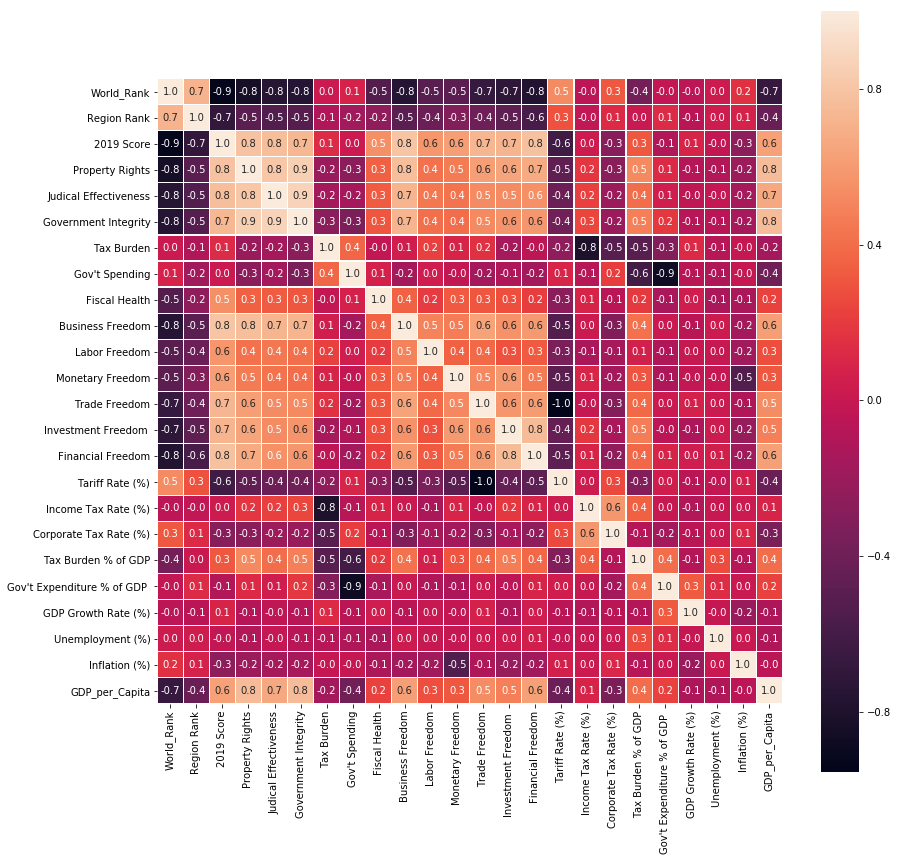

In [13]:
f,ax = plt.subplots(figsize = (14, 14))
sns.heatmap(data.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)

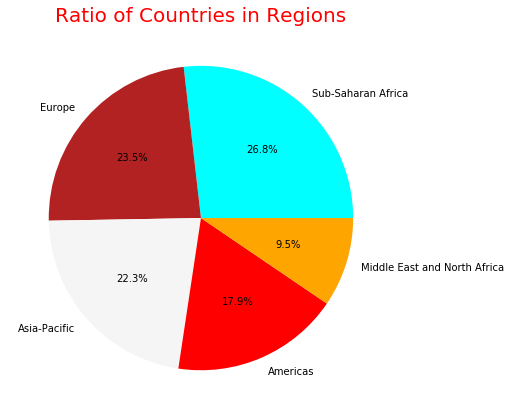

In [14]:
labels = data.Region.value_counts().index
colors = ['cyan', 'firebrick', 'whitesmoke', 'red', 'orange']
explode = [0, 0, 0, 0, 0]
sizes = data.Region.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title("Ratio of Countries in Regions", color = 'red', fontsize = 20)
plt.show()

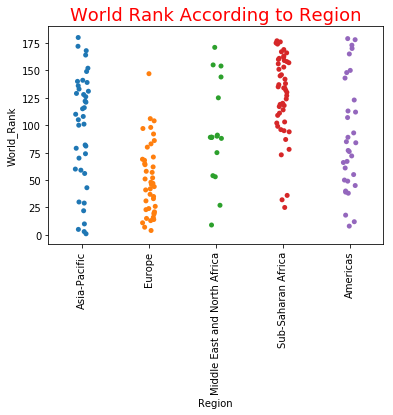

In [15]:
x = sns.stripplot(x = "Region", y = data.World_Rank, data=data, jitter = True) 
plt.xticks(rotation = 90)
plt.title("World Rank According to Region", color = 'red', fontsize = 18)
plt.show()

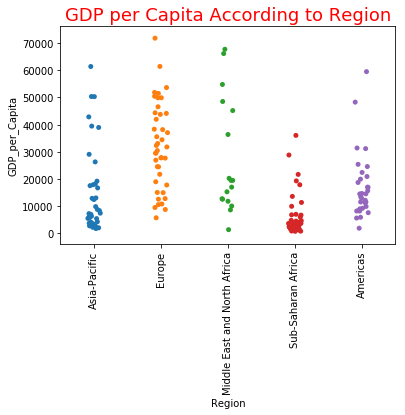

In [16]:
x = sns.stripplot(x = "Region", y = data.GDP_per_Capita, data=data, jitter = True)
plt.xticks(rotation = 90)
plt.title("GDP per Capita According to Region", color = 'red', fontsize = 18)
plt.show()

In [17]:
data.mean()

World_Rank                        92.905028
Region Rank                       20.737430
2019 Score                        60.256983
Property Rights                   51.608939
Judical Effectiveness             44.173184
Government Integrity              40.597765
Tax Burden                        77.335196
Gov't Spending                    64.083799
Fiscal Health                     65.268156
Business Freedom                  63.089385
Labor Freedom                     59.111732
Monetary Freedom                  74.921788
Trade Freedom                     73.815642
Investment Freedom                56.312849
Financial Freedom                 48.156425
Tariff Rate (%)                    6.201117
Income Tax Rate (%)               28.553073
Corporate Tax Rate (%)            24.203911
Tax Burden % of GDP               21.955307
Gov't Expenditure % of GDP        34.011173
GDP Growth Rate (%)                3.469274
Unemployment (%)                   7.525140
Inflation (%)                   

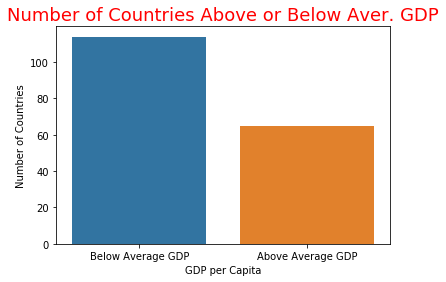

In [18]:
above_GDPmean =['Above Average GDP' if i >= 17941.491620 else 'Below Average GDP' for i in data.GDP_per_Capita] #mean replaced after dropping outliers
df = pd.DataFrame({'GDP_Growth_Rate' : above_GDPmean})
sns.countplot(x = df.GDP_Growth_Rate)
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Countries')
plt.title('Number of Countries Above or Below Aver. GDP', color = 'red', fontsize = 18)
plt.show()

In [19]:
data.describe()

,World_Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),Unemployment (%),Inflation (%),GDP_per_Capita
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,92.905028,20.737430,60.256983,51.608939,44.173184,40.597765,77.335196,64.083799,65.268156,63.089385,...,48.156425,6.201117,28.553073,24.203911,21.955307,34.011173,3.469274,7.525140,10.832402,17941.491620
std,50.759478,12.637482,10.869548,19.202151,17.753878,19.065976,13.216199,23.202303,31.780774,15.774850,...,19.093446,5.502175,13.001782,8.575117,10.138547,15.479867,5.920153,5.637274,81.205557,17049.758408
min,1.000000,1.000000,6.000000,8.000000,5.000000,8.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,11.000000,-14.000000,0.000000,-1.000000,677.000000
25%,50.500000,10.000000,54.000000,37.000000,31.000000,26.000000,71.000000,51.500000,38.500000,54.000000,...,30.000000,2.000000,20.000000,20.000000,14.000000,25.000000,2.000000,4.000000,1.000000,4004.000000
50%,92.000000,20.000000,61.000000,50.000000,43.000000,36.000000,79.000000,69.000000,80.000000,63.000000,...,50.000000,5.000000,30.000000,25.000000,21.000000,32.000000,3.000000,6.000000,3.000000,12377.000000
75%,135.500000,31.000000,67.000000,64.500000,53.500000,50.000000,86.000000,81.500000,90.000000,74.500000,...,60.000000,9.000000,35.000000,30.000000,29.500000,40.000000,5.000000,9.500000,6.000000,27690.500000
max,180.000000,47.000000,90.000000,95.000000,87.000000,97.000000,100.000000,97.000000,100.000000,96.000000,...,90.000000,50.000000,60.000000,50.000000,47.000000,139.000000,71.000000,27.000000,1088.000000,71831.000000


In [20]:
data.mean()

World_Rank                        92.905028
Region Rank                       20.737430
2019 Score                        60.256983
Property Rights                   51.608939
Judical Effectiveness             44.173184
Government Integrity              40.597765
Tax Burden                        77.335196
Gov't Spending                    64.083799
Fiscal Health                     65.268156
Business Freedom                  63.089385
Labor Freedom                     59.111732
Monetary Freedom                  74.921788
Trade Freedom                     73.815642
Investment Freedom                56.312849
Financial Freedom                 48.156425
Tariff Rate (%)                    6.201117
Income Tax Rate (%)               28.553073
Corporate Tax Rate (%)            24.203911
Tax Burden % of GDP               21.955307
Gov't Expenditure % of GDP        34.011173
GDP Growth Rate (%)                3.469274
Unemployment (%)                   7.525140
Inflation (%)                   

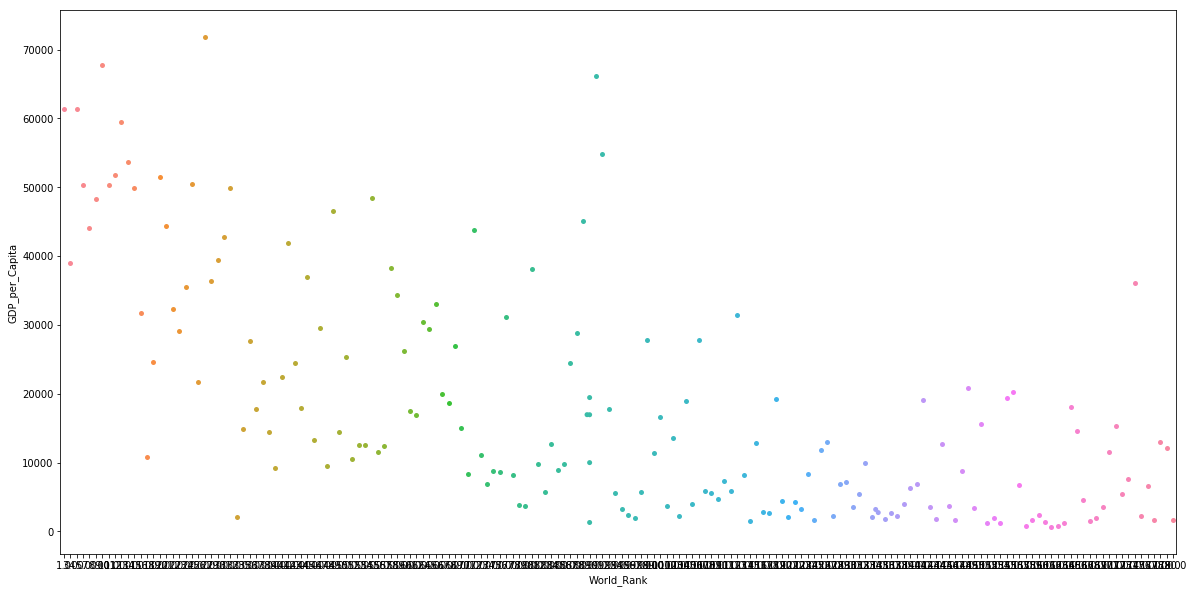

In [21]:
plt.figure(figsize=(20,10))

sns.swarmplot(x='World_Rank', y='GDP_per_Capita', data=data)

In [22]:
data.corr()["GDP_per_Capita"].sort_values(ascending=True).head(10) #variables that are in negative corr. with GDP Per Capita

World_Rank               -0.668879
Region Rank              -0.421196
Tariff Rate (%)          -0.413665
Gov't Spending           -0.382600
Corporate Tax Rate (%)   -0.338694
Tax Burden               -0.156114
GDP Growth Rate (%)      -0.114908
Unemployment (%)         -0.102740
Inflation (%)            -0.047548
Income Tax Rate (%)       0.090392
Name: GDP_per_Capita, dtype: float64

In [23]:
data.corr()["GDP_per_Capita"].sort_values(ascending=False).head(20) #variables that are in positive corr. with GDP Per Capita

GDP_per_Capita                 1.000000
Property Rights                0.760663
Government Integrity           0.757822
Judical Effectiveness          0.671369
2019 Score                     0.631180
Financial Freedom              0.624210
Business Freedom               0.617572
Trade Freedom                  0.534823
Investment Freedom             0.479283
Tax Burden % of GDP            0.404680
Monetary Freedom               0.314763
Labor Freedom                  0.282384
Fiscal Health                  0.234889
Gov't Expenditure % of GDP     0.229735
Income Tax Rate (%)            0.090392
Inflation (%)                 -0.047548
Unemployment (%)              -0.102740
GDP Growth Rate (%)           -0.114908
Tax Burden                    -0.156114
Corporate Tax Rate (%)        -0.338694
Name: GDP_per_Capita, dtype: float64

In [24]:
correlatedvars = ["GDP_per_Capita","Property Rights","Government Integrity","Judical Effectiveness","2019 Score","Financial Freedom","Business Freedom"
            ,"Trade Freedom", "Investment Freedom ", "Monetary Freedom", "Labor Freedom"]
correlatedvars += ["World_Rank","Region Rank","Tariff Rate (%)", "Corporate Tax Rate (%)", "Unemployment (%)"]
#selecting columns that are both in positive corr. or negative corr.

In [25]:
correlated = data.loc[:,correlatedvars]

In [26]:
correlated["GDP_per_Capita"].sort_values(ascending=False).head(30)

126    71831.0
175    67741.0
91     66163.0
160    61422.0
72     61393.0
177    59501.0
144    54777.0
121    53635.0
74     51842.0
159    51475.0
63     50425.0
6      50334.0
162    50294.0
45     49883.0
7      49869.0
10     48505.0
29     48265.0
14     46553.0
127    45157.0
58     44333.0
176    44118.0
59     43761.0
83     42832.0
109    41945.0
89     39434.0
122    38934.0
155    38286.0
81     38140.0
43     37023.0
80     36340.0
Name: GDP_per_Capita, dtype: float64

17941.49162011173


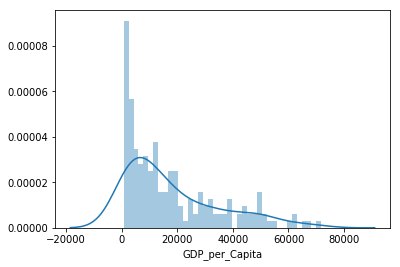

In [27]:
print(np.mean(correlated["GDP_per_Capita"]))
sns.distplot(correlated["GDP_per_Capita"],bins=40)

In [28]:
correlated['GDP'] = np.where(correlated['GDP_per_Capita']>=12811, 1, 0) #adding binary column to be able to analyze data

In [29]:
data

,Country Name,Region,World_Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),Unemployment (%),Inflation (%),GDP_per_Capita
0,Afghanistan,Asia-Pacific,152.0,39.0,52.0,20.0,30.0,25.0,92.0,80.0,...,10.0,7.0,20.0,20.0,5.0,26.0,3.0,9.0,5.0,1958.0
1,Albania,Europe,52.0,27.0,67.0,55.0,31.0,40.0,86.0,74.0,...,70.0,1.0,23.0,15.0,25.0,30.0,4.0,14.0,2.0,12507.0
2,Algeria,Middle East and North Africa,171.0,14.0,46.0,32.0,36.0,29.0,76.0,49.0,...,30.0,9.0,35.0,23.0,25.0,41.0,2.0,10.0,6.0,15237.0
3,Angola,Sub-Saharan Africa,156.0,33.0,51.0,36.0,27.0,21.0,84.0,81.0,...,40.0,9.0,17.0,30.0,21.0,25.0,1.0,8.0,32.0,6753.0
4,Argentina,Americas,148.0,26.0,52.0,48.0,45.0,34.0,69.0,50.0,...,60.0,8.0,35.0,30.0,31.0,41.0,3.0,9.0,26.0,20876.0
5,Armenia,Europe,47.0,24.0,68.0,57.0,46.0,39.0,85.0,79.0,...,70.0,2.0,26.0,20.0,21.0,26.0,8.0,18.0,1.0,9456.0
6,Australia,Asia-Pacific,5.0,4.0,81.0,79.0,87.0,80.0,63.0,60.0,...,90.0,1.0,45.0,30.0,28.0,37.0,2.0,6.0,2.0,50334.0
7,Austria,Europe,31.0,16.0,72.0,84.0,71.0,77.0,51.0,25.0,...,70.0,2.0,50.0,25.0,43.0,50.0,3.0,6.0,2.0,49869.0
8,Azerbaijan,Asia-Pacific,60.0,13.0,65.0,59.0,53.0,45.0,88.0,60.0,...,60.0,5.0,25.0,20.0,15.0,37.0,0.0,5.0,13.0,17492.0
9,Bahamas,Americas,76.0,15.0,63.0,42.0,47.0,44.0,97.0,87.0,...,60.0,19.0,0.0,0.0,16.0,21.0,1.0,13.0,1.0,31139.0


In [30]:
correlated #our new dataset

,GDP_per_Capita,Property Rights,Government Integrity,Judical Effectiveness,2019 Score,Financial Freedom,Business Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Labor Freedom,World_Rank,Region Rank,Tariff Rate (%),Corporate Tax Rate (%),Unemployment (%),GDP
0,1958.0,20.0,25.0,30.0,52.0,10.0,49.0,66.0,10.0,77.0,60.0,152.0,39.0,7.0,20.0,9.0,0
1,12507.0,55.0,40.0,31.0,67.0,70.0,69.0,88.0,70.0,82.0,53.0,52.0,27.0,1.0,15.0,14.0,0
2,15237.0,32.0,29.0,36.0,46.0,30.0,62.0,67.0,30.0,75.0,50.0,171.0,14.0,9.0,23.0,10.0,1
3,6753.0,36.0,21.0,27.0,51.0,40.0,56.0,61.0,30.0,55.0,59.0,156.0,33.0,9.0,30.0,8.0,0
4,20876.0,48.0,34.0,45.0,52.0,60.0,56.0,70.0,55.0,60.0,47.0,148.0,26.0,8.0,30.0,9.0,1
5,9456.0,57.0,39.0,46.0,68.0,70.0,78.0,81.0,75.0,78.0,71.0,47.0,24.0,2.0,20.0,18.0,0
6,50334.0,79.0,80.0,87.0,81.0,90.0,88.0,88.0,80.0,87.0,84.0,5.0,4.0,1.0,30.0,6.0,1
7,49869.0,84.0,77.0,71.0,72.0,70.0,75.0,86.0,90.0,82.0,69.0,31.0,16.0,2.0,25.0,6.0,1
8,17492.0,59.0,45.0,53.0,65.0,60.0,70.0,75.0,60.0,63.0,64.0,60.0,13.0,5.0,20.0,5.0,1
9,31139.0,42.0,44.0,47.0,63.0,60.0,69.0,48.0,50.0,78.0,68.0,76.0,15.0,19.0,0.0,13.0,1


In [31]:
correlatedvars

['GDP_per_Capita',
 'Property Rights',
 'Government Integrity',
 'Judical Effectiveness',
 '2019 Score',
 'Financial Freedom',
 'Business Freedom',
 'Trade Freedom',
 'Investment Freedom ',
 'Monetary Freedom',
 'Labor Freedom',
 'World_Rank',
 'Region Rank',
 'Tariff Rate (%)',
 'Corporate Tax Rate (%)',
 'Unemployment (%)']

<Figure size 504x504 with 0 Axes>

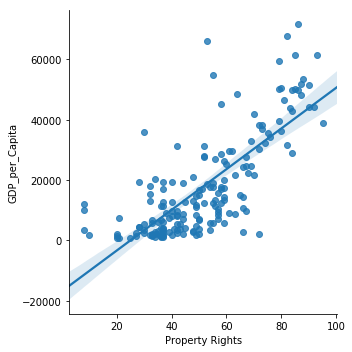

In [32]:
plt.figure(figsize=(7,7))
sns.lmplot(x='Property Rights', y='GDP_per_Capita', data=data) #highest positive correlated variable with GDP per capita

<Figure size 504x504 with 0 Axes>

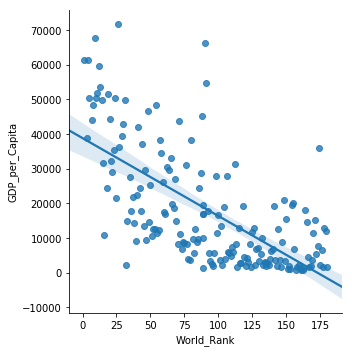

In [33]:
plt.figure(figsize=(7,7))
sns.lmplot(x='World_Rank', y='GDP_per_Capita', data=data) #negatively correlated

<Figure size 504x504 with 0 Axes>

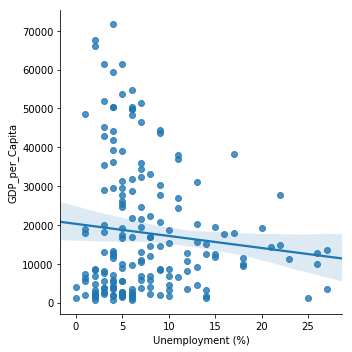

In [34]:
plt.figure(figsize=(7,7))
sns.lmplot(x='Unemployment (%)', y='GDP_per_Capita', data=data)

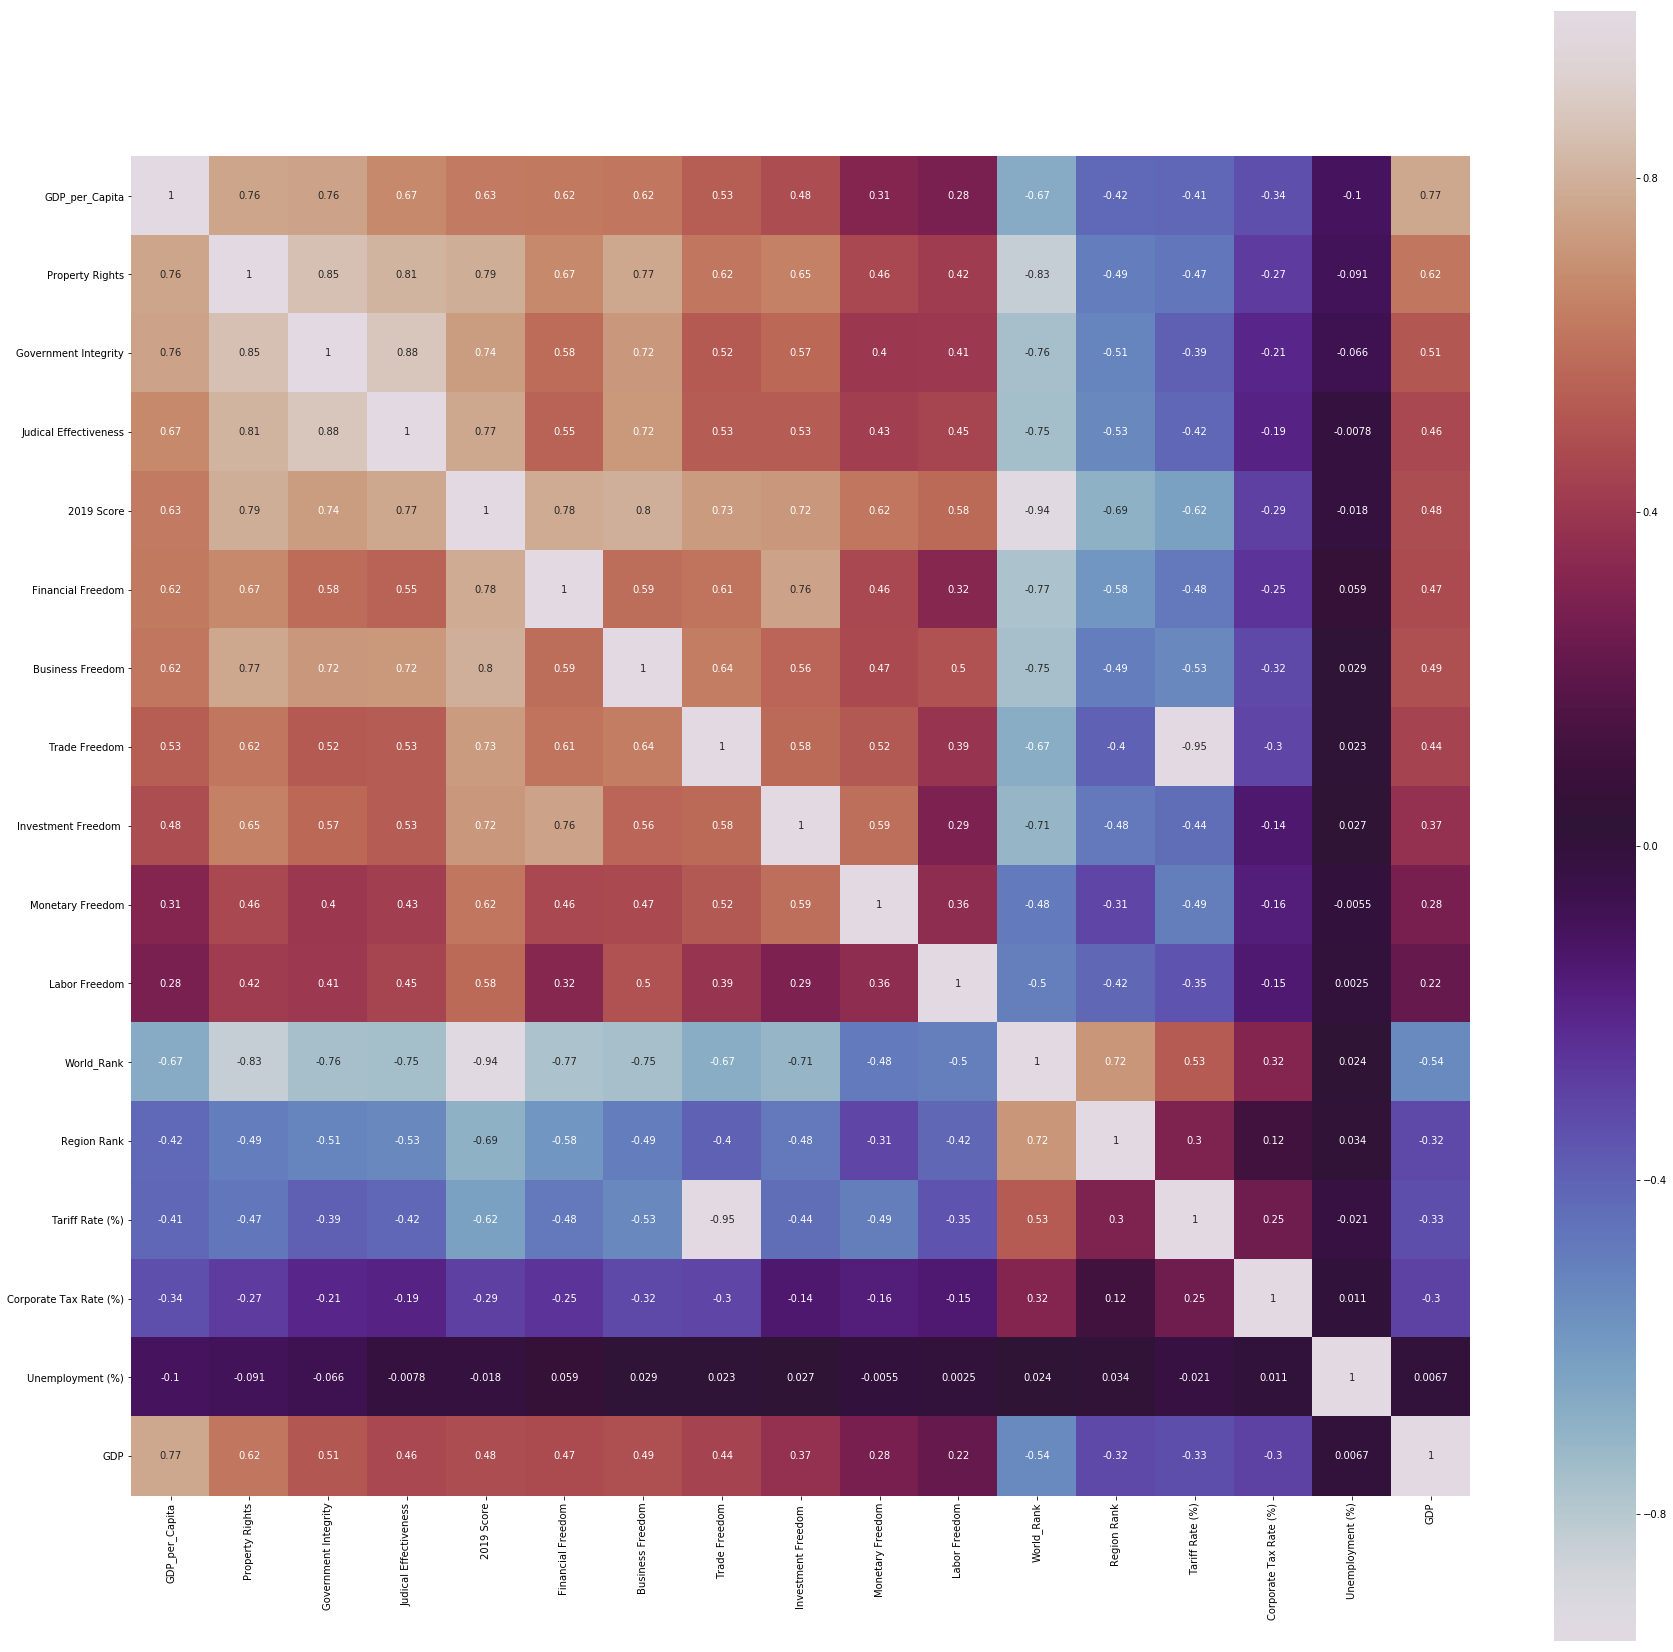

In [35]:
plt.figure(figsize=(30,30))
sns.heatmap(correlated.corr(),  square=True, annot=True, cmap='twilight') #heatmap of correlations

In [36]:
#with dropped variables more than 0.7 correlation with property rights to remove multicollinearity 
correlated.drop(["Government Integrity","Judical Effectiveness","2019 Score", "Business Freedom"],axis=1,inplace=True)

In [37]:
correlatedvars = ["GDP_per_Capita","Property Rights","Financial Freedom","Trade Freedom", "Investment Freedom ", "Monetary Freedom", "Labor Freedom"]
correlatedvars += ["World_Rank","Region Rank","Tariff Rate (%)", "Corporate Tax Rate (%)", "Unemployment (%)"]
#updating correlatedvars

In [38]:
correlated

,GDP_per_Capita,Property Rights,Financial Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Labor Freedom,World_Rank,Region Rank,Tariff Rate (%),Corporate Tax Rate (%),Unemployment (%),GDP
0,1958.0,20.0,10.0,66.0,10.0,77.0,60.0,152.0,39.0,7.0,20.0,9.0,0
1,12507.0,55.0,70.0,88.0,70.0,82.0,53.0,52.0,27.0,1.0,15.0,14.0,0
2,15237.0,32.0,30.0,67.0,30.0,75.0,50.0,171.0,14.0,9.0,23.0,10.0,1
3,6753.0,36.0,40.0,61.0,30.0,55.0,59.0,156.0,33.0,9.0,30.0,8.0,0
4,20876.0,48.0,60.0,70.0,55.0,60.0,47.0,148.0,26.0,8.0,30.0,9.0,1
5,9456.0,57.0,70.0,81.0,75.0,78.0,71.0,47.0,24.0,2.0,20.0,18.0,0
6,50334.0,79.0,90.0,88.0,80.0,87.0,84.0,5.0,4.0,1.0,30.0,6.0,1
7,49869.0,84.0,70.0,86.0,90.0,82.0,69.0,31.0,16.0,2.0,25.0,6.0,1
8,17492.0,59.0,60.0,75.0,60.0,63.0,64.0,60.0,13.0,5.0,20.0,5.0,1
9,31139.0,42.0,60.0,48.0,50.0,78.0,68.0,76.0,15.0,19.0,0.0,13.0,1


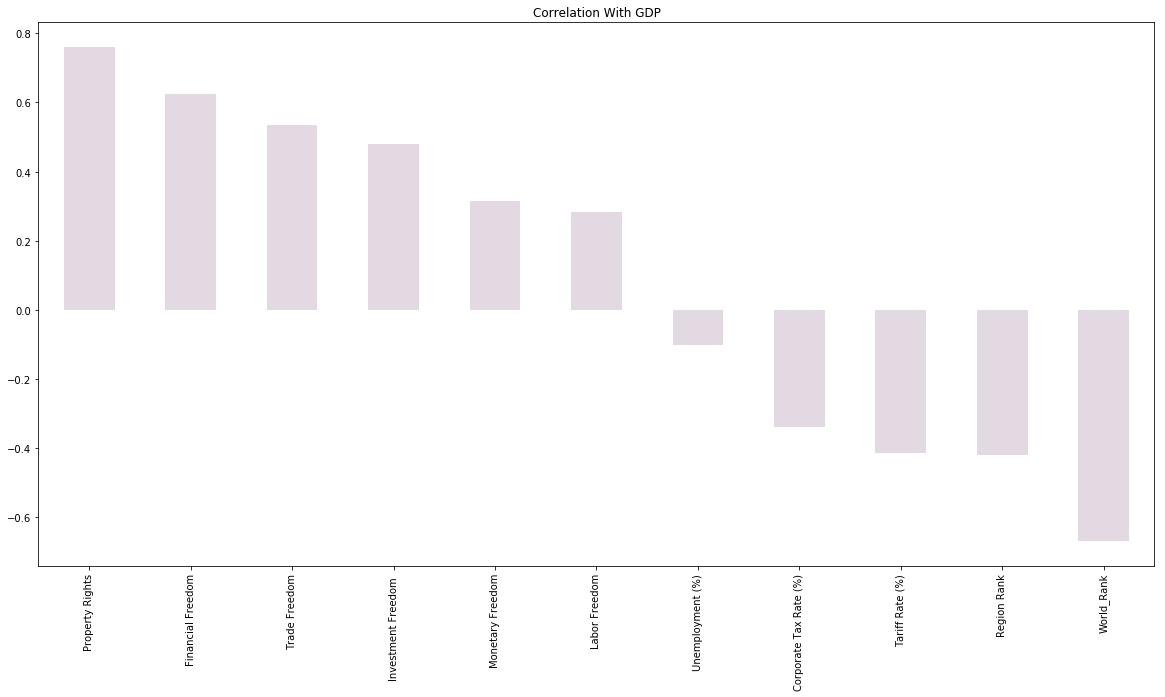

In [39]:
plt.figure(figsize=(20,10))
plt.title("Correlation With GDP")
plt.rc("font",size=23)
correlated.corr().drop(["GDP_per_Capita", "GDP"],axis=0)["GDP_per_Capita"].sort_values(ascending=False).plot(kind="bar",cmap="twilight")

In [40]:
# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
X = correlated.drop(["GDP_per_Capita"],axis=1)
Y = correlated["GDP_per_Capita"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

linear_regression = LinearRegression()

linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
coeffs = pd.DataFrame(index=X.columns)
coeffs["coefficients"]=linear_regression.coef_ 
coeffs

,coefficients
Property Rights,321.132156
Financial Freedom,242.439665
Trade Freedom,95.455376
Investment Freedom,-111.812723
Monetary Freedom,-57.320367
Labor Freedom,-31.992999
World_Rank,8.066796
Region Rank,0.382555
Tariff Rate (%),7.195379
Corporate Tax Rate (%),-99.948264


In [45]:
preds = linear_regression.predict(X_test)

from sklearn import metrics
print("MSE: ", metrics.mean_squared_error(y_test,preds))
print("R^2: ",metrics.r2_score(y_test,preds))

MSE:  83632588.6137833
R^2:  0.7372751953265584


In [46]:
print('intercept:', linear_regression.intercept_)
print('slope:', linear_regression.coef_)

intercept: -8318.320213566243
slope: [ 3.21132156e+02  2.42439665e+02  9.54553758e+01 -1.11812723e+02
 -5.73203672e+01 -3.19929986e+01  8.06679615e+00  3.82554534e-01
  7.19537859e+00 -9.99482640e+01 -3.28506359e+02  1.56626096e+04]


In [47]:
import statsmodels.api as sm
linear_model = sm.OLS(y_train,X_train)

In [48]:
results = linear_model.fit() #Linear Regression with OLS to compare to our model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     82.61
Date:                Tue, 06 Aug 2019   Prob (F-statistic):           5.39e-55
Time:                        18:08:47   Log-Likelihood:                -1491.5
No. Observations:                 143   AIC:                             3007.
Df Residuals:                     131   BIC:                             3043.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Property Rights          322

In [49]:
# Classification Methods


In [50]:
## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
correlated.drop("GDP_per_Capita",axis=1,inplace=True) #we drop GDP per capita to form the predictors list

In [54]:
del(correlatedvars[0]) #dropping from variables list

In [55]:
features = []
param_grid = {'C':[.01,.03,.1,.3,1,3,10]}
for i in range(len(correlatedvars)-1):
    features = correlatedvars[0:i+1]
    
    X_train, X_test, y_train, y_test = train_test_split(correlated[features],correlated["GDP"], test_size=0.3, random_state=101)
    
    kf = KFold(n_splits=5)
    
    logreg = LogisticRegression(solver='liblinear')#/solver specification was needed to silence the warning
    logreg.fit(X_train,y_train)
    
    gs_logreg = GridSearchCV(logreg, param_grid=param_grid, cv=kf)

    gs_logreg.fit(X_train, y_train)
    


    print("-----------------------------------------------------------------------------------")
    print("Optimal Regularization Parameter C:{}".format(gs_logreg.best_params_["C"]))
    logreg=LogisticRegression(C=gs_logreg.best_params_["C"])
    logreg.fit(X_train,y_train)
    print(features)
    print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kf))))
    print('Accuracy score on test set is: {:.3f}'.format(logreg.score(X_test, y_test)))
    

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:10
['Property Rights']
Average accuracy score on cv (KFold) set: 0.824
Accuracy score on test set is: 0.759


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:10
['Property Rights', 'Financial Freedom']
Average accuracy score on cv (KFold) set: 0.800
Accuracy score on test set is: 0.778


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:10
['Property Rights', 'Financial Freedom', 'Trade Freedom']
Average accuracy score on cv (KFold) set: 0.808
Accuracy score on test set is: 0.778


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:10
['Property Rights', 'Financial Freedom', 'Trade Freedom', 'Investment Freedom ']
Average accuracy score on cv (KFold) set: 0.792
Accuracy score on test set is: 0.796


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:10
['Property Rights', 'Financial Freedom', 'Trade Freedom', 'Investment Freedom ', 'Monetary Freedom']
Average accuracy score on cv (KFold) set: 0.792
Accuracy score on test set is: 0.796


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:10
['Property Rights', 'Financial Freedom', 'Trade Freedom', 'Investment Freedom ', 'Monetary Freedom', 'Labor Freedom']
Average accuracy score on cv (KFold) set: 0.760
Accuracy score on test set is: 0.778


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:0.01
['Property Rights', 'Financial Freedom', 'Trade Freedom', 'Investment Freedom ', 'Monetary Freedom', 'Labor Freedom', 'World_Rank']
Average accuracy score on cv (KFold) set: 0.752
Accuracy score on test set is: 0.741


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:3
['Property Rights', 'Financial Freedom', 'Trade Freedom', 'Investment Freedom ', 'Monetary Freedom', 'Labor Freedom', 'World_Rank', 'Region Rank']
Average accuracy score on cv (KFold) set: 0.728
Accuracy score on test set is: 0.759


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:0.01
['Property Rights', 'Financial Freedom', 'Trade Freedom', 'Investment Freedom ', 'Monetary Freedom', 'Labor Freedom', 'World_Rank', 'Region Rank', 'Tariff Rate (%)']
Average accuracy score on cv (KFold) set: 0.712
Accuracy score on test set is: 0.759


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:0.01
['Property Rights', 'Financial Freedom', 'Trade Freedom', 'Investment Freedom ', 'Monetary Freedom', 'Labor Freedom', 'World_Rank', 'Region Rank', 'Tariff Rate (%)', 'Corporate Tax Rate (%)']
Average accuracy score on cv (KFold) set: 0.760
Accuracy score on test set is: 0.759


C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [56]:
preds=logreg.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.72      0.75      0.73        24

   micro avg       0.76      0.76      0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



In [57]:
print(confusion_matrix(y_test,preds))

[[23  7]
 [ 6 18]]


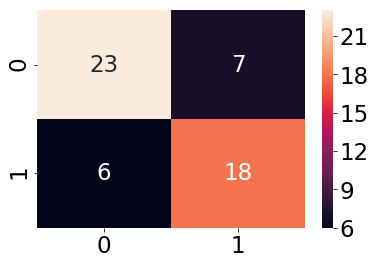

In [58]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

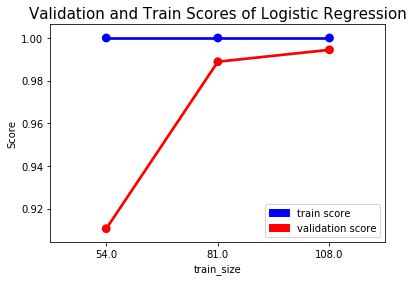

In [59]:
from sklearn.model_selection import learning_curve
import matplotlib.patches as mpatches
plt.rc("font",size=10)
plt.title('Validation and Train Scores of Logistic Regression',size=15)
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(C=10),correlated, correlated["GDP"], 
                                                         train_sizes=[(i+2)*27 for i in range(3)], cv=5)
train_sizes
for i in range(len(train_sizes)):
    train_scores[i]=train_scores[i].mean()
    valid_scores[i]=valid_scores[i].mean()
train_scores = np.asarray(train_scores[:,1])
valid_scores = np.asarray(valid_scores[:,1])
valid_df = pd.DataFrame([train_scores,valid_scores,train_sizes]).transpose()
valid_df.columns = ['train_score','valid_score','train_size']
sns.pointplot(x='train_size',y='train_score',data=valid_df, color="blue")
sns.pointplot(x='train_size',y='valid_score',data=valid_df,color='red')
plt.ylabel('Score')
blue = mpatches.Patch(color='blue', label='train score')
red = mpatches.Patch(color='red', label='validation score')
plt.legend(handles=[blue,red])

In [60]:
#Logit regression to compare to our machine learning model
import statsmodels.api as sm  
logit_model=sm.Logit(y_test,X_test)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.356960
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.480     
Dependent Variable:   GDP               AIC:               58.5517   
Date:                 2019-08-06 18:09  BIC:               78.4415   
No. Observations:     54                Log-Likelihood:    -19.276   
Df Model:             9                 LL-Null:           -37.096   
Df Residuals:         44                LLR p-value:       4.5919e-05
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------------
Property Rights         0.2157   0.0659  3.2714 0.0011  0.0865 0.3450
Financial Freedo

In [61]:
#K nearest neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
def my_min(sequence):
    """return the minimum element of sequence"""
    low = sequence[0] # need to start with some value
    for i in sequence:
        if i < low:
            low = i
    return low

features = []
for i in range(len(correlatedvars)-1):
    features = correlatedvars[0:i+1]
    correlated.dropna(subset=["GDP"],inplace=True)
    correlated.dropna(subset=features,inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(correlated[features],correlated["GDP"], test_size=0.3, random_state=20)
    kf = KFold(n_splits=5)
    
    error_rate = []
    #Find the optimal K by finding the errors from 1 to 40 and picking the K with lowest error
    for i in range(1,40):
    
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    ideal_K = error_rate.index(my_min(error_rate)) +1
    
    print("-----------------------------------------------------------------------------------")
    knn=KNeighborsClassifier(n_neighbors=ideal_K)
    knn.fit(X_train,y_train)
    print("Ideal K:{}".format(ideal_K))
    print(features)
    print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(knn, X_train, y_train, cv=kf))))
    print('Accuracy score on test set is: {:.3f}'.format(knn.score(X_test, y_test)))

-----------------------------------------------------------------------------------
Ideal K:27
['Property Rights']
Average accuracy score on cv (KFold) set: 0.768
Accuracy score on test set is: 0.815
-----------------------------------------------------------------------------------
Ideal K:23
['Property Rights', 'Financial Freedom']
Average accuracy score on cv (KFold) set: 0.800
Accuracy score on test set is: 0.759
-----------------------------------------------------------------------------------
Ideal K:17
['Property Rights', 'Financial Freedom', 'Trade Freedom']
Average accuracy score on cv (KFold) set: 0.824
Accuracy score on test set is: 0.759
-----------------------------------------------------------------------------------
Ideal K:13
['Property Rights', 'Financial Freedom', 'Trade Freedom', 'Investment Freedom ']
Average accuracy score on cv (KFold) set: 0.832
Accuracy score on test set is: 0.741
--------------------------------------------------------------------------------

Text(0, 0.5, 'Error Rate')

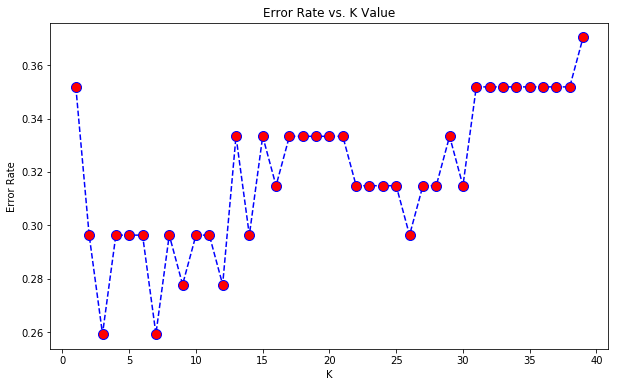

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')




In [65]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [66]:
preds = knn.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        26
           1       0.72      0.64      0.68        28

   micro avg       0.69      0.69      0.69        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.69      0.69      0.68        54



In [67]:
print(confusion_matrix(y_test,preds))

[[19  7]
 [10 18]]


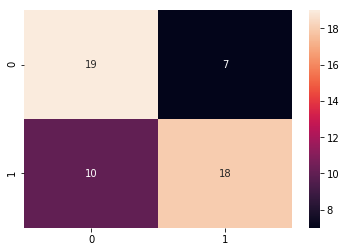

In [68]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

In [69]:
print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(knn, X_train, y_train, cv=kf))))
print('Accuracy score on test set is: {:.3f}'.format(knn.score(X_test, y_test)))



Average accuracy score on cv (KFold) set: 0.800
Accuracy score on test set is: 0.685


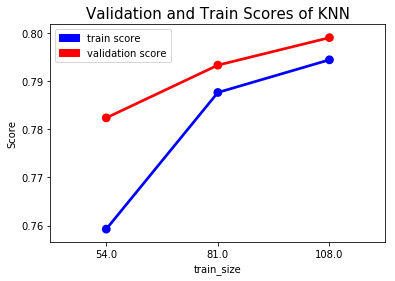

In [70]:
best_features = ["Property Rights","Financial Freedom","Trade Freedom", "Investment Freedom "]


plt.rc("font",size=10)
plt.title('Validation and Train Scores of KNN',size=15)
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=25), correlated[best_features],correlated["GDP"], train_sizes=[(i+2)*27 for i in range(3)], cv=5)
train_sizes
for i in range(len(train_sizes)):
    train_scores[i]=train_scores[i].mean()
    valid_scores[i]=valid_scores[i].mean()
train_scores = np.asarray(train_scores[:,1])
valid_scores = np.asarray(valid_scores[:,1])
valid_df = pd.DataFrame([train_scores,valid_scores,train_sizes]).transpose()
valid_df.columns = ['train_score','valid_score','train_size']
sns.pointplot(x='train_size',y='train_score',data=valid_df, color="blue")
sns.pointplot(x='train_size',y='valid_score',data=valid_df,color='red')
plt.ylabel('Score')
blue = mpatches.Patch(color='blue', label='train score')
red = mpatches.Patch(color='red', label='validation score')
plt.legend(handles=[blue,red])


